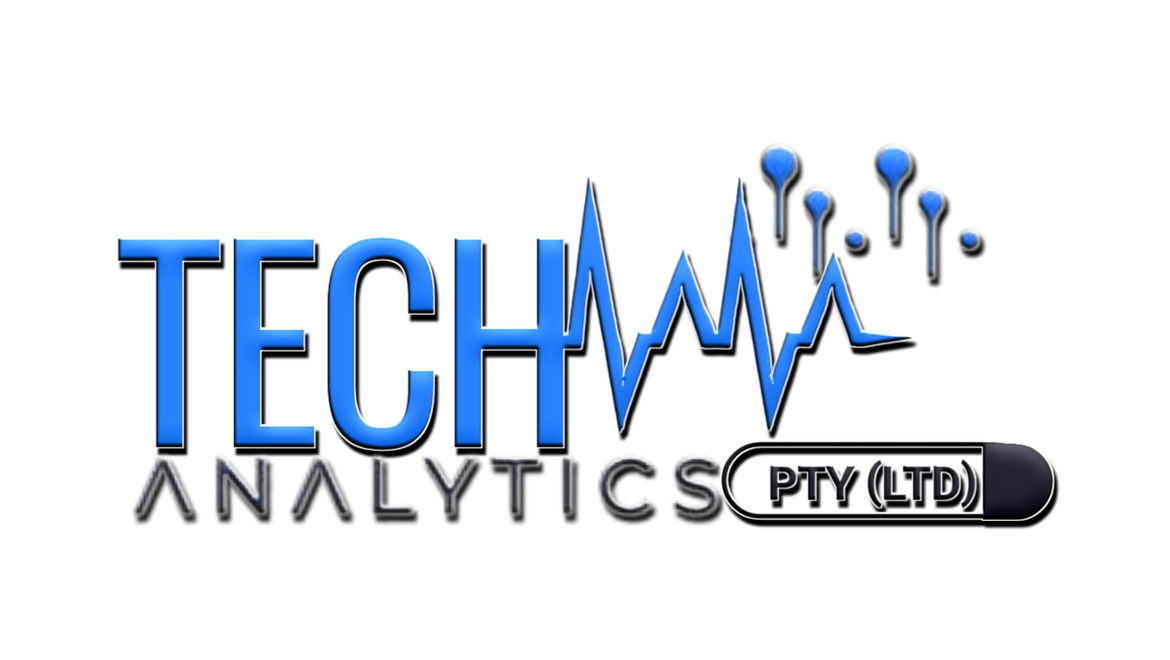

### Predict Overview: Movie Recommendation Challenge

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.


### Problem Statement:

With this context, EA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

#### What value is achieved through building a functional recommender system?

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.




<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Modelling</a>

<a href=#five>5. Performance Evaluation</a>

<a href=#six>6. Data Engineering</a>

<a href=#seven>7. Model Predictions on Unseen data</a>

<a href=#eight>8. Conclusion</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
|Importing packages to load, manipulate, visualise, model and evaluate the set out data. |

---

In [ ]:

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp

# Package for timing code
import timeit
import time
import datetime


# Packages for visualization
import matplotlib
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS 

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")


# Packages for modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from surprise import Reader
from surprise import Dataset
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD,NormalPredictor
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering,BaselineOnly
from sklearn.neighbors import  NearestNeighbors
import heapq

# Performance Evaluation
from surprise import accuracy
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from surprise.model_selection import GridSearchCV, cross_validate, train_test_split
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Packages for Randomisation
import random
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_32/1903428848.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-pastel')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Loading the datasets and checking the structure of the datasets as well as addressing any anomalies. |

---



### 2.1. IMPORTING DATASETS

In [1]:
#Movies dataframe
movies_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/movies.csv')

#Genome_scores dataframe
genome_score = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_scores.csv')

#Genome_tags dataframe
genome_tags = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/genome_tags.csv')

#imbd dataframe
imdb_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/imdb_data.csv')

#links dataframe
links_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/links.csv')

#tags dataframe
tags_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/tags.csv')

#train dataframe
train_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')

#test dataframe 
test_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/test.csv')

<u>Above we have the following datasets</u>:

* genome_scores.csv - a score mapping the strength between movies and tag-related properties.
* genome_tags.csv - user assigned tags for genome-related scores.
* imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
* links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
* sample_submission.csv - Sample of the submission format for the hackathon.
* tags.csv - User assigned for the movies within the dataset.
* test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
* train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.




### 2.2. DATA OVERVIEW & SUMMARY STATISTICS

### 2.2.1. Train data

#### 2.2.1.1. First 5 rows of train data

In [5]:
display(train_df.head())

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


#### 2.2.1.2. Composition of train data

In [6]:
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


None

#### 2.2.1.3. Missing values in each column of train data

In [7]:
print(train_df.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


We can see that the train df has over 10 million entries with only 4 features.Now let us do further analysis of the training set.

In [8]:
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train_df.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train_df["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train_df["movieId"]))))
print("Highest value of a User ID = "+str(max(train_df["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train_df["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


#### 2.2.1.4. Observations on train data

* There are 10000038 rows and 4 columns.
* The data types consist of 3 integer and 1 float data type
* The size of the data is 305.2 MB
* The date is in timestamp, this would be converted to data time during feature engineering.

### 2.2.2. Movies data

In [9]:
# View movies data info and shape and content head 
print('\033[1m'+"First 5 rows of movies data"+'\033[0m')
display(movies_df.head())
print("\n")
print('\033[1m'+"Composition of movies data"+'\033[0m')
movies_df.info() 
print("\n")
print('\033[1m'+"Missing values in each column of movies data"+'\033[0m')
print(movies_df.isnull().sum()) 

First 5 rows of movies data


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy




Composition of movies data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


Missing values in each column of movies data
movieId    0
title      0
genres     0
dtype: int64


### 2.2.3. Genome score and tags

The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews. 

The file genome-scores.csv contains movie-tag relevance data in the following format:
movieId,tagId,relevance.

The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:
tagId,tag

In [10]:
#genome score data composition
print('\033[1m'+"Composition of genome_score data"+'\033[0m')
genome_score.info() 
print('\n')
#genome tags first 5 rows
print('\033[1m'+"First 5 rows of genome_tags data"+'\033[0m')
display(genome_tags.head()) 
print('\n')
#genome tags data composition
print('\033[1m'+"Composition of genome_tags data"+'\033[0m')
genome_tags.info() 
print('\n')
#genome tags all null values
print('\033[1m'+"Missing values in each column of genome_tags data"+'\033[0m')
print(genome_tags.isnull().sum())

Composition of genome_score data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


First 5 rows of genome_tags data


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s




Composition of genome_tags data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


Missing values in each column of genome_tags data
tagId    0
tag      0
dtype: int64


### 2.2.4. Imdb database of movies

In [11]:
#imdb_df first five rows
print('\033[1m'+"First 5 rows of imdb_df data"+'\033[0m')
display(imdb_df.head()) 
print('\n')
#imdb_df composition of the dataframe
print('\033[1m'+"Composition of imdb_df data"+'\033[0m')
display(imdb_df.info()) 
print('\n')
#imdb_df sum all null values for 
print('\033[1m'+"Missing values in each column of imdb_df data"+'\033[0m')
imdb_df.isnull().sum()

First 5 rows of imdb_df data


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion




Composition of imdb_df data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None



Missing values in each column of imdb_df data


movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

There are **62423** movies in the movies database and only **27278** in the imdb dataset. The IMBD dataset gives more infomation to about 27000+ movies present in the train dataset. The features are title_cast, director, runtime, budget as well plot_keywords. The title_cast feature describes the most famous/paid actors/actresses in the movie and runtime describes how long movie was and plot_keyword describes the most important key words of the plot

There are a lot of missing values in this data frame,to invesitage further we will look into the dataframes column by column to a clear description of the dataset by looking at the count, perecntage of missing values aswell as the datatype for each column.

#### 2.2.4.1. Investigating proportions of missing values

In [12]:
print(f'The imdb dataset has {imdb_df.shape[0]} rows/entries and {len(imdb_df.columns)} columns')
percentange=imdb_df.isnull().mean().round(4) * 100
count = imdb_df.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':imdb_df.dtypes},
                                index=imdb_df.columns)
count_percentage

The imdb dataset has 27278 rows/entries and 6 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title_cast,10068,36.91,object
director,9874,36.20,object
runtime,12089,44.32,float64
budget,19372,71.02,object
plot_keywords,11078,40.61,object


The imdb dataset has 27278 rows/entries and 6 columns

It appears that most of the columns in the Dataset has over 25 % of missing values, meaning that our dataset has caputured only 75% or less information from the real world data. Missing Values is a common occurance when dealing with real world data. There are various ways to handle missing values the most effective technique being imputing missing values with either a 0 or using aggregate methods such as mean and median.

### 2.2.5. Tags data

In [13]:
#Display first five rows for our tags dataframe
print('\033[1m'+"First 5 rows of tags_df data"+'\033[0m')
display(tags_df.head()) 
print('\n')
#display the compostion of our tags dataframe
print('\033[1m'+"Composition of tags_df data"+'\033[0m')
display(tags_df.info()) 
print('\n')
#Print the total number of null values in our dataframe
print('\033[1m'+"Missing values in each column of tags_df data"+'\033[0m')
print(tags_df.isnull().sum())

First 5 rows of tags_df data


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455




Composition of tags_df data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


None



Missing values in each column of tags_df data
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


### 2.2.6. Number of entries in each database

In [24]:
#Created a Data Frame outlining the size of our data
dataframes = ['train_df', 'test_df', 'tags_df', 'imdb_df',
              'links_df', 'movies_df', 'genome_tags', 'genome_scores']
Number_of_entries = [len(train_df), len(test_df), len(tags_df),
         len(movies_df), len(links_df), len(imdb_df), 
         len(genome_tags), len(genome_score)]
total_size_df = pd.DataFrame(list(zip(dataframes, Number_of_entries)),
                             columns=['dataframe', 'Number of entries'])
total_size_df

,dataframe,Number of entries
0,train_df,10000038
1,test_df,5000019
2,tags_df,1093360
3,imdb_df,62423
4,links_df,62423
5,movies_df,27278
6,genome_tags,1128
7,genome_scores,15584448


We have Obeserved the number of entries/length of our df. We will now observe how many unique values each feature of interest has.


### 2.2.7. Count of unique values in each feature of interest

In [14]:
# Count the number of unique entries for features of interest
unique_movies = len(movies_df['movieId'].unique().tolist())
unique_tags = len(tags_df['tag'].unique().tolist())
unique_users = len(train_df['userId'].unique().tolist())
unique_directors = len(imdb_df['director'].unique().tolist())
unique_actors = len(imdb_df['title_cast'].unique().tolist())

# Create a dataframe to store the number of unique entries for features of interest
unique = pd.DataFrame({"movies": [unique_movies],
                       "tags" : [unique_tags],
                       "users": [unique_users],
                       "directors" : [unique_directors],
                       "actors" : [unique_actors]}, index=['unique_entries'])

print('\033[1m'+'Number of unique entries for features of interest'+'\033[0m')
display(unique.transpose())

# Determine and display the min and max ratings received
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Number of unique entries for features of interest


,unique_entries
movies,62423
tags,73051
users,162541
directors,11787
actors,17144


Lowest rating: 0.5
Highest rating: 5.0


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we visualise the data and recover interesting insights that lie in the data structure. |

---


![image.png](https://media2.giphy.com/media/nCzrl2mzk9BT2/giphy.gif?cid=ecf05e47bkkca5eadgt2s344z73gksfo6j429a1pdyz4q2oa&rid=giphy.gif&ct=g)

# Exploring rating trends by genre over time



<center><img src="https://dicevfs.in/blog/wp-content/uploads/2021/03/Genres-In-Film.jpg" width=50%/></center>

In this section we aim to develop an understanding of how the ratings for the various genres change over time. This analysis is challenging as most movies have more than one genre, such as "Romantic comedies" or "Dramic thrillers". In the below analysis we refer to 'genre' as the entire classification in the dataframe and 'subgenre' as the descriptions separated by pipes (|) in the genre column.

As a preprocessing step we will merge the datasets into one to be able to map out the insights in relation to other related features.

### 3.1. MERGING FEATURES OF INTEREST

We will begin by examining the number of unique genres listed in the dataframe.

In [15]:
#We will merge the movies dataframe and the movies dataframe
new_data = pd.merge(train_df, movies_df, on='movieId', how='left')

In [16]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
new_data['rating_year'] = new_data['timestamp'].apply(lambda timestamp: datetime.datetime.fromtimestamp(timestamp).year)
new_data.drop('timestamp', axis=1, inplace=True)

In [19]:
## function to change "Sci-Fi" to "Sci_Fi", "Film-Noir" to 'Film_Noir' and '(no genres listed)' to 'no_genres_listed' in genres
def change_genre(genre):
    # dictionary to map old and new name
    dct_ = {'Sci-Fi':'Sci_Fi','Film-Noir':'Film_Noir',
            '(no genres listed)':'no_genres_listed'}
    lst = [] # list to store genres in genre
    # iterate inside of the the genre in each row
    for i in genre:
        # change only the words in the dict_
        if i in dct_.keys():
            i = dct_[i]
            lst.append(i)
        else:
            # leave other words as they are
            i = i
            lst.append(i)
    # return genre strings
    return " ".join(lst)

In [20]:
# merge train and movie data on movieId and sort the table
train_joined = pd.merge(train_df.drop(columns = 'timestamp'),movies_df, how = 'inner', on = 'movieId').sort_values(by = ['userId','movieId'])
# confirm if joined table has the correct amount of observations
print(train_joined.shape)
# view first five rows of joined table
train_joined.head()

(10000038, 5)


,userId,movieId,rating,title,genres
502801,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
6852635,1,665,5.0,Underground (1995),Comedy|Drama|War
6086993,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance
6325668,1,1175,3.5,Delicatessen (1991),Comedy|Drama|Romance
5047680,1,1217,3.5,Ran (1985),Drama|War


### 3.2. VISUALISATION OF RATINGS PER YEAR

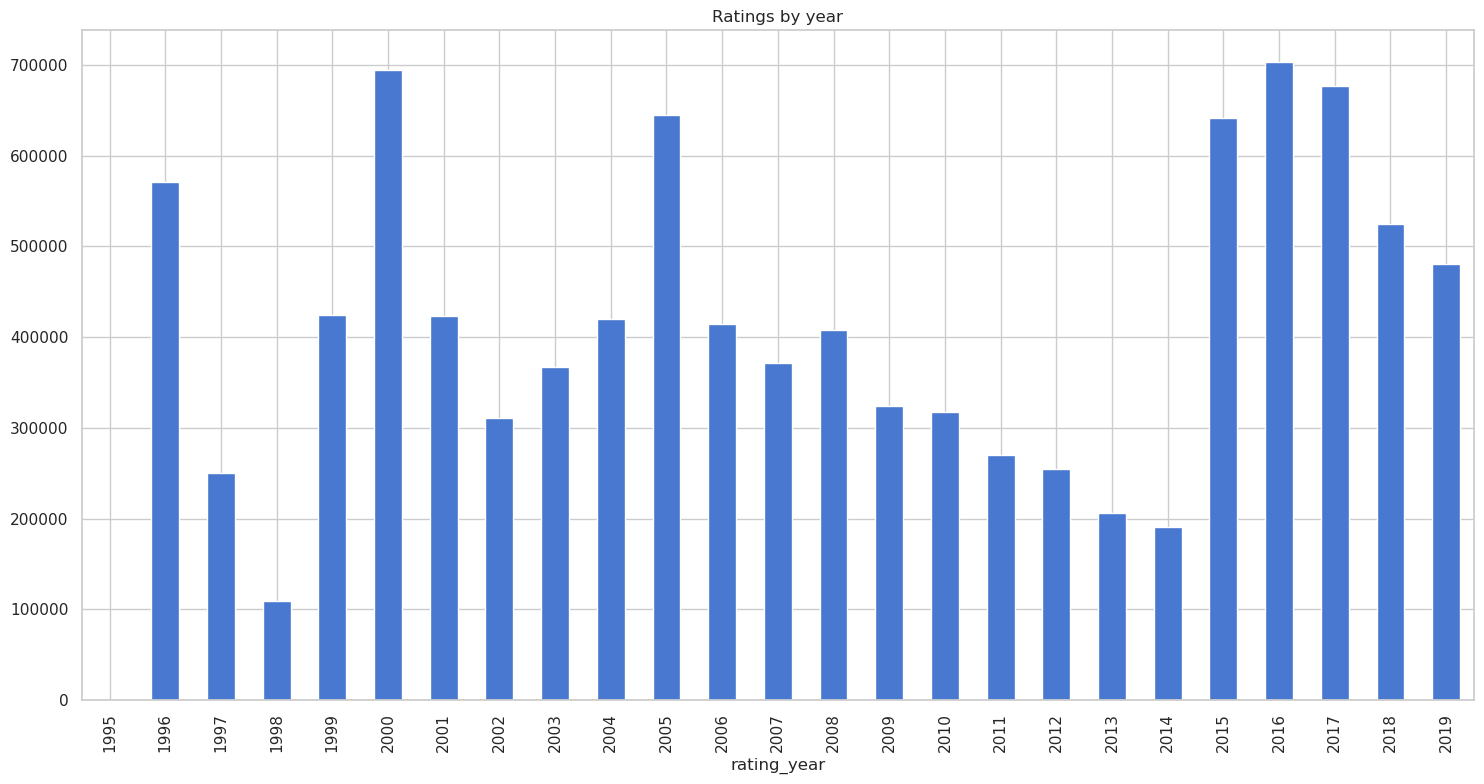

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax1 = new_data.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year')
fig.tight_layout()

__2016__ has the most number of ratings when compared to the other years.
having approximately __700 000__ ratings

### Further EDA Approach Outline

We have been provided with a lot of datasets to help us model at a good recommender system. We will perform an EDA to get as much information about the movies and users as we can from the database,to make data driven decisions.

Here we will go ahead and do an extensive analysis on:
* Ratings and users
* Runtime
* Genres
* Release year
* Directors
* Actors
* Plot keywords


### 3.3. RATINGS AND USERS

Using the train dataset, we can get an overview of how each user rated each movie. It was observed that each user can rate a movie from 0.5 (Worst) to 5.0 (Best). Here is the full detailed scale:
 * 0.5 - Very Bad
 * 1.0 - Bad
 * 1.5 - Moderately Bad
 * 2.0 - Not that Bad
 * 2.5 - Less than average 
 * 3.0 - Average 
 * 3.5 - Above than average 
 * 4.0 - Good
 * 4.5 - Very Good
 * 5.0 - Excellent 
 <br>

### 3.3.1. Which users have rated the most movies ?

In [22]:
#In the function below we look at the users who rated movies the most
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='Set1', edgecolor="white")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=14, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=18)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()

Combined number of ratings:	 34398 
Total number of movies:		 48213


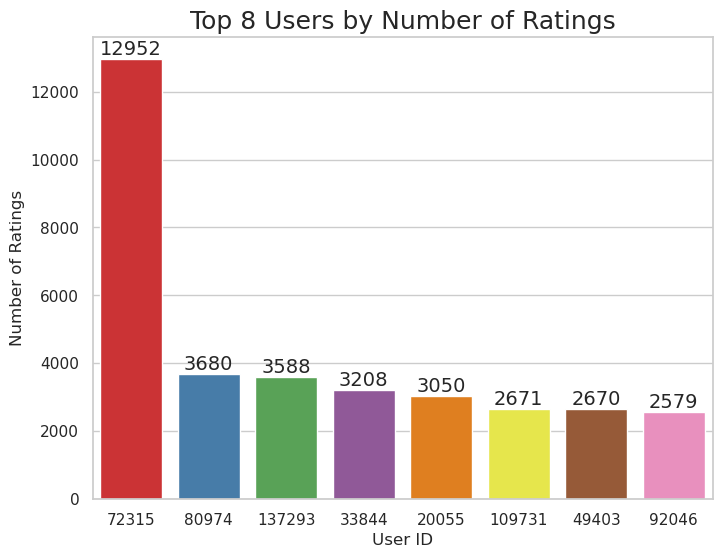

In [23]:
user_ratings_count(train_df,8)

The user 72315 has rated a lot of movies compared to the other users,we will remove this user for EDA purposes. This eliminates an outlier user that may overestimate the skewness of the insights to follow.

In [24]:
#user 72315 is removed to prevent the data from being skewed 
eda_df = train_df[train_df['userId']!=72315]

Combined number of ratings:	 23734 
Total number of movies:		 45844


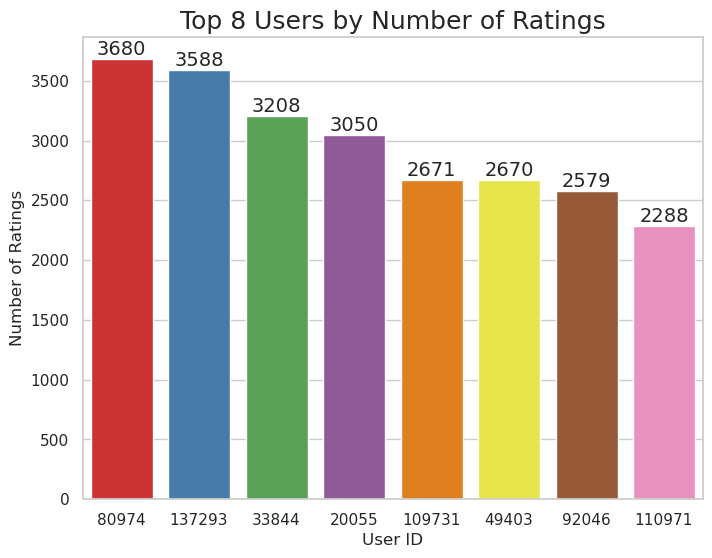

In [25]:
user_ratings_count(eda_df,8)

### 3.3.2. Count of Ratings for each rating increment

In [26]:
from datetime import datetime

def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]
def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count
def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count

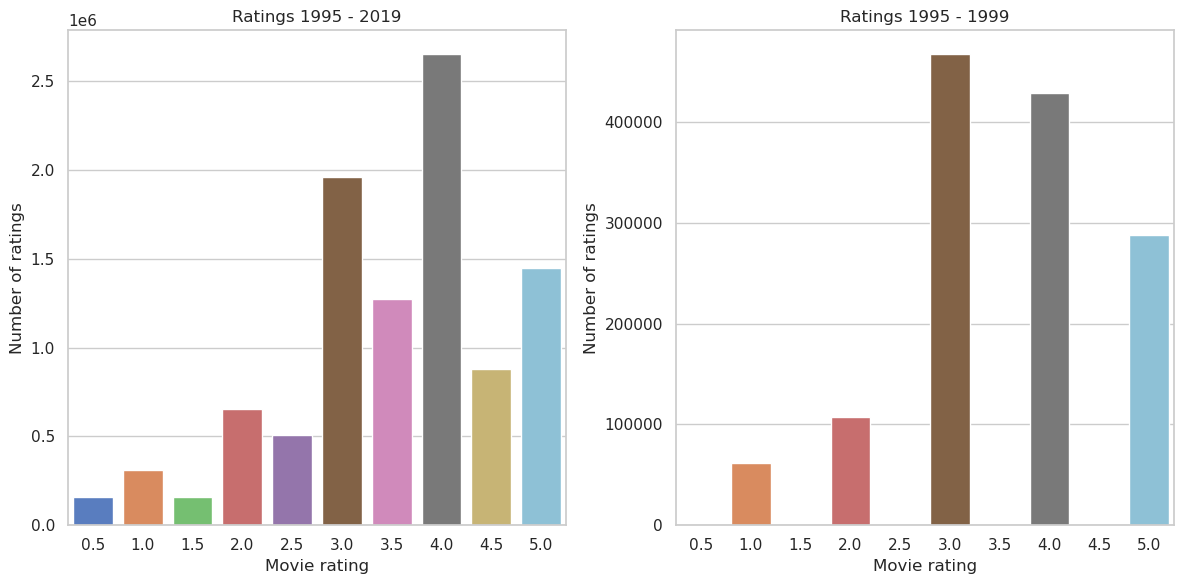

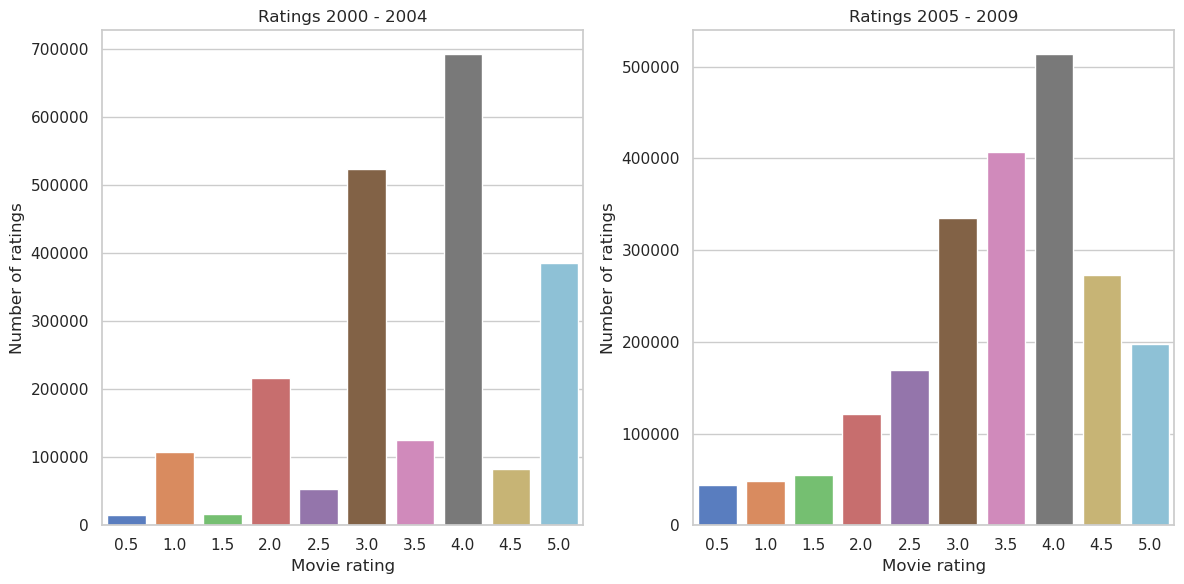

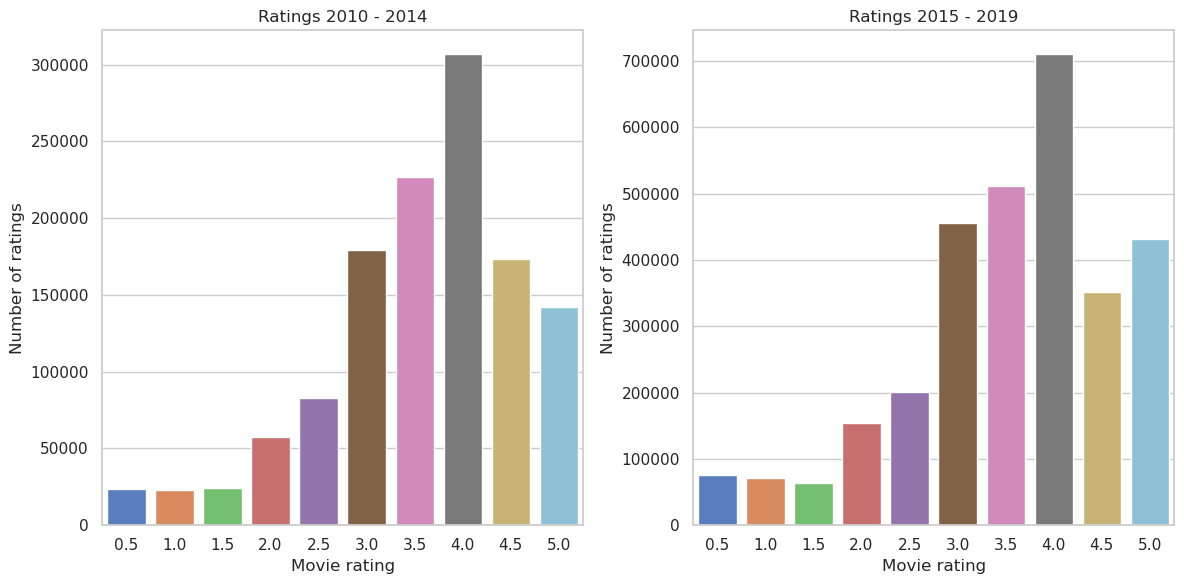

In [27]:
import seaborn as sns 

keys = np.linspace(0.5, 5.0, 10)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 1995, 2019), ax=ax[0])
ax1.set_title('Ratings 1995 - 2019')
ax1.set(xlabel='Movie rating', ylabel='Number of ratings')

ax2 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 1995, 1999), ax=ax[1])
ax2.set_title('Ratings 1995 - 1999')
ax2.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax3 = sns.barplot(x=keys,y=count_ratings_by_years(new_data, 2000, 2004), ax=ax[0])
ax3.set_title('Ratings 2000 - 2004')
ax3.set(xlabel='Movie rating', ylabel='Number of ratings')

ax4 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2005, 2009), ax=ax[1])
ax4.set_title('Ratings 2005 - 2009')
ax4.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax5 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2010, 2014), ax=ax[0])
ax5.set_title('Ratings 2010 - 2014')
ax5.set(xlabel='Movie rating', ylabel='Number of ratings')

ax6 = sns.barplot(x=keys, y=count_ratings_by_years(new_data, 2015, 2019), ax=ax[1])
ax6.set_title('Ratings 2015 - 2019')
ax6.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

From 1995-2019,the most common rating is 4.0, which might mean only the users who loved the movie are likely to leave a rating. The period between 1995 and 1999 did no have a very high number of ratings and a rating of 3.0 was the most popular. The patterns in ratings in all the periods indicated in the graphs can be used to explain about patterns in movie development and user preferences. Interestingly, movie data can be used to infer so much about movie popularity, behavior of movie lovers and the likelihood of one rating a movie after watching.

### 3.3.3. The number of Ratings lost from removing the outlier user.

In [28]:
#As a result of using one user
print("No of ratings lost:\t",34398-23734)
print("Movies rated by user 72315:\t",48213-45844)

No of ratings lost:	 10664
Movies rated by user 72315:	 2369


### 3.3.4. What is the distribution of ratings from worst to best?

In [30]:
def ratings_distplot(df, column='rating'):
    """
    Plots the distribution of ratings in the dataset.
    """
    plt.figure(figsize=(10,10))
    ax = sns.distplot(df[f'{column}'],bins=10, kde=False, hist_kws=dict(alpha=0.6),color="blue")
    mean = df[f'{column}'].mean()
    median = df[f'{column}'].median()
    plt.axvline(x=mean, label = f'mean {round(mean,2)}' , color='#4D17A0', lw=3, ls = '--')
    plt.axvline(x=median, label = f'median {median}' , color='#4DA017', lw=3, ls = '--')
    plt.xlim((0.5,5))
    plt.ylim((0,2500000))
    plt.title(f'Distribution of Ratings', fontsize=14)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

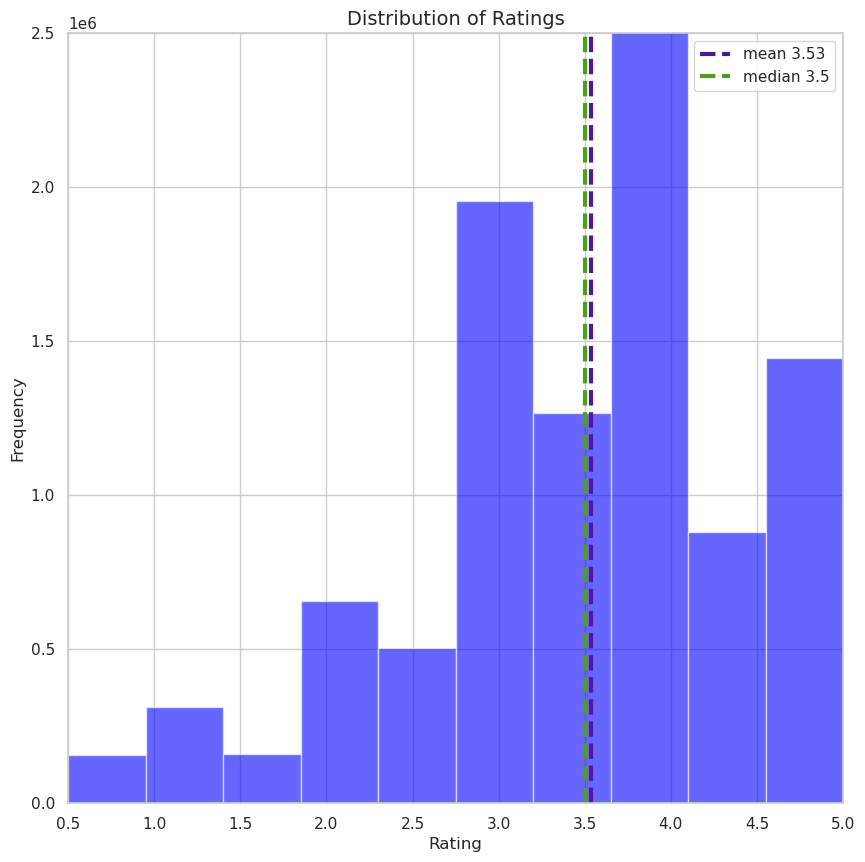

In [31]:
ratings_distplot(eda_df)

Here the we can see that the ratings have a left skewed distribution,This implies that most users tend to only give psitive reviews.

### 3.3.5. The Percentage of movies rated in each category

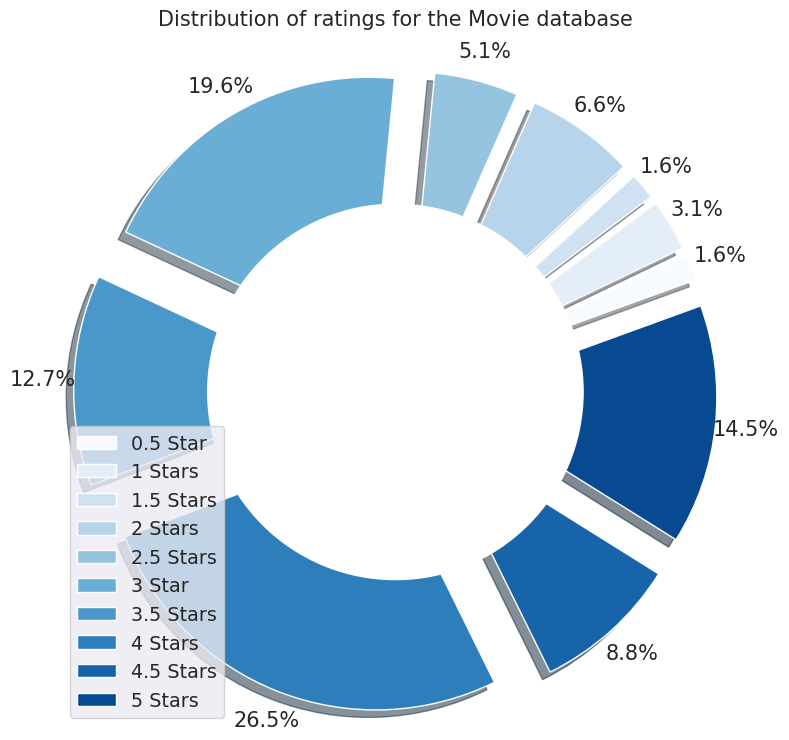

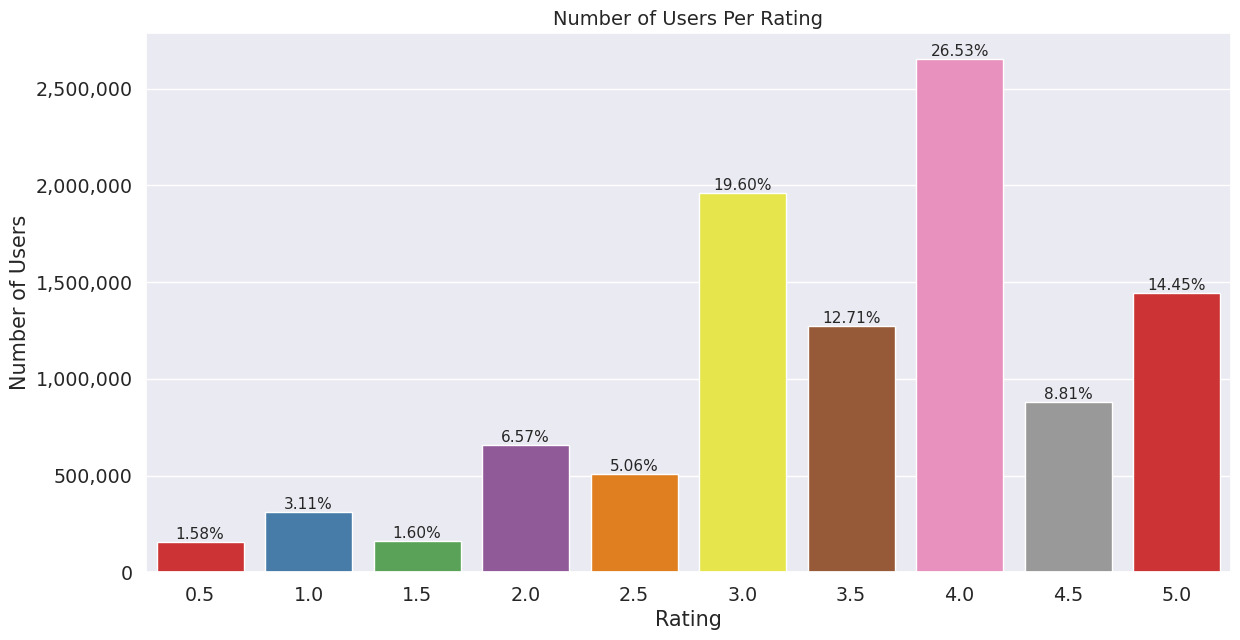

In [32]:
# Merge train with movies to join movie titles and ratings 
ratings = train_df.merge(movies_df, on='movieId', how='inner')

# Count how many ratings are in each category OO
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Blues')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.2, 0.2, 0.2,0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Distribution of ratings for the Movie database\n', fontsize=15)
plt.tight_layout()
plt.show()


movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(14,7))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="Set1", edgecolor="white", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

This chart can explain that people only tend to rate the movies that they like. In other words, if a user doesn't like a movie, it is unlikely that they will watch it through to the end,and therefore they will not rate it.

Most of the users are weighted within the score range of 3.0 - 5.0, with the most users being weighted in the 4.0 score, accounting for 26.53% of the users. This indicates that most of the users give ratings above 2.5, and with fewer users giving a score of 0.5 which only only consists of 1.58% of the users. Similiarly with the score of 1.5 only accounting to 1.60% of users.

### 3.3.6. Distribution of ratings across genre counts

Please explain this subsection

In [33]:
def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]
def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count
def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count

In [34]:
# Creating a genre count column, for the number of genres a movie belongs to
new_data['genre_count'] = new_data['genres'].apply(lambda genres: len(genres.split('|')))

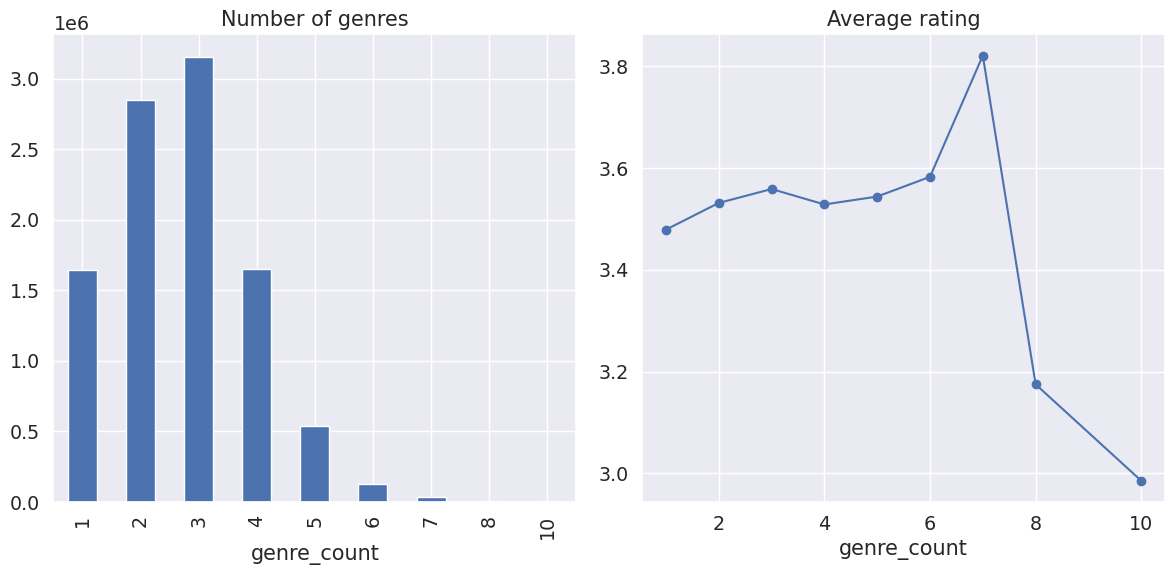

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = new_data.groupby('genre_count')['rating'].count().plot(kind='bar', title='Number of genres', ax=ax[0])
ax2 = new_data.groupby('genre_count')['rating'].mean().plot(kind='line', marker='o', title='Average rating', ax=ax[1])

fig.tight_layout()

### 3.3.7. Evolution of movie numbers over time

The general view is that from the late 1800s the world has seen a steady increase in the numbers of movie released per year. It can be attributed to economic growth, technological advancements and a rise in talents within the movie making industry.

In [36]:
# Creating the release year by extracting the release year from the movie title
new_data['release_year'] = new_data['title'].apply(get_release_dates)

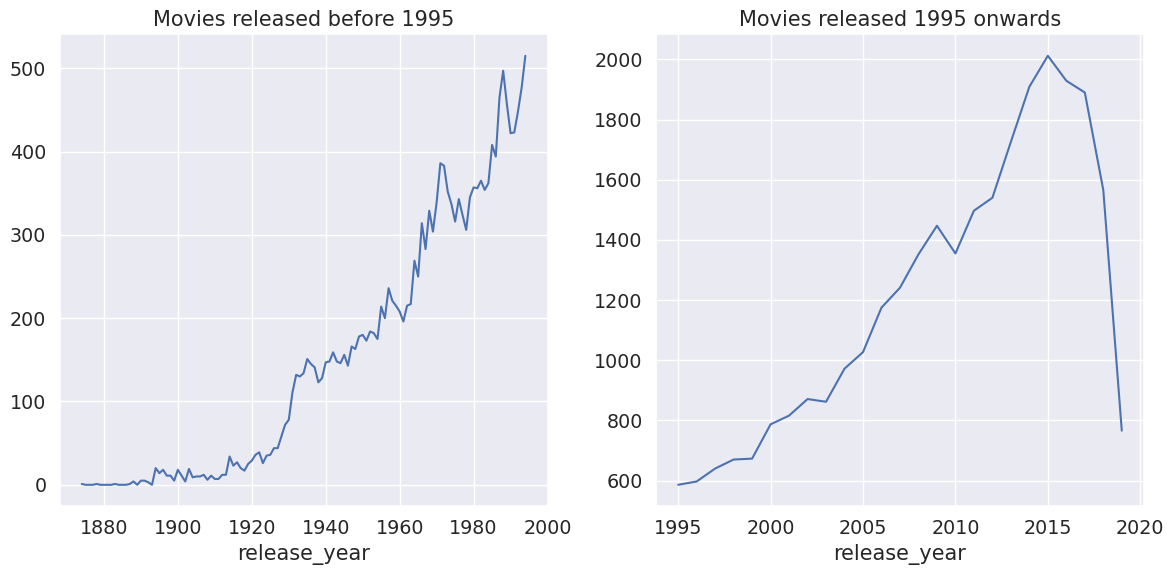

In [37]:
# Creating a visual of pre 1995 and post 1995 movies release
pre_95_releases = pd.DataFrame({'release_year': list(range(1874, 1995)),
                                       'count': get_releases_by_year(new_data, range(1874, 1995))})
post_95_releases = pd.DataFrame({'release_year': list(range(1995, 2020)),
                                       'count': get_releases_by_year(new_data, range(1995, 2020))})

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = pre_95_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[0], title='Movies released before 1995')
ax2 = post_95_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[1], title='Movies released 1995 onwards')

fig.tight_layout()

Period between 1995 to 2019 saw the production of 29,906 movies. In comparison 17,937 movies were produced from 1994 backwards to 1874. The sharp increase in movie production can be attributed to advancements in technology and funding availability. A movie recommender system is key for users who have a large number of movies to select what to watch.

### 3.4. RUNTIME

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try to gain some additional insights about the nature of movie lengths and their evolution over time.


<Axes: xlabel='runtime', ylabel='Density'>

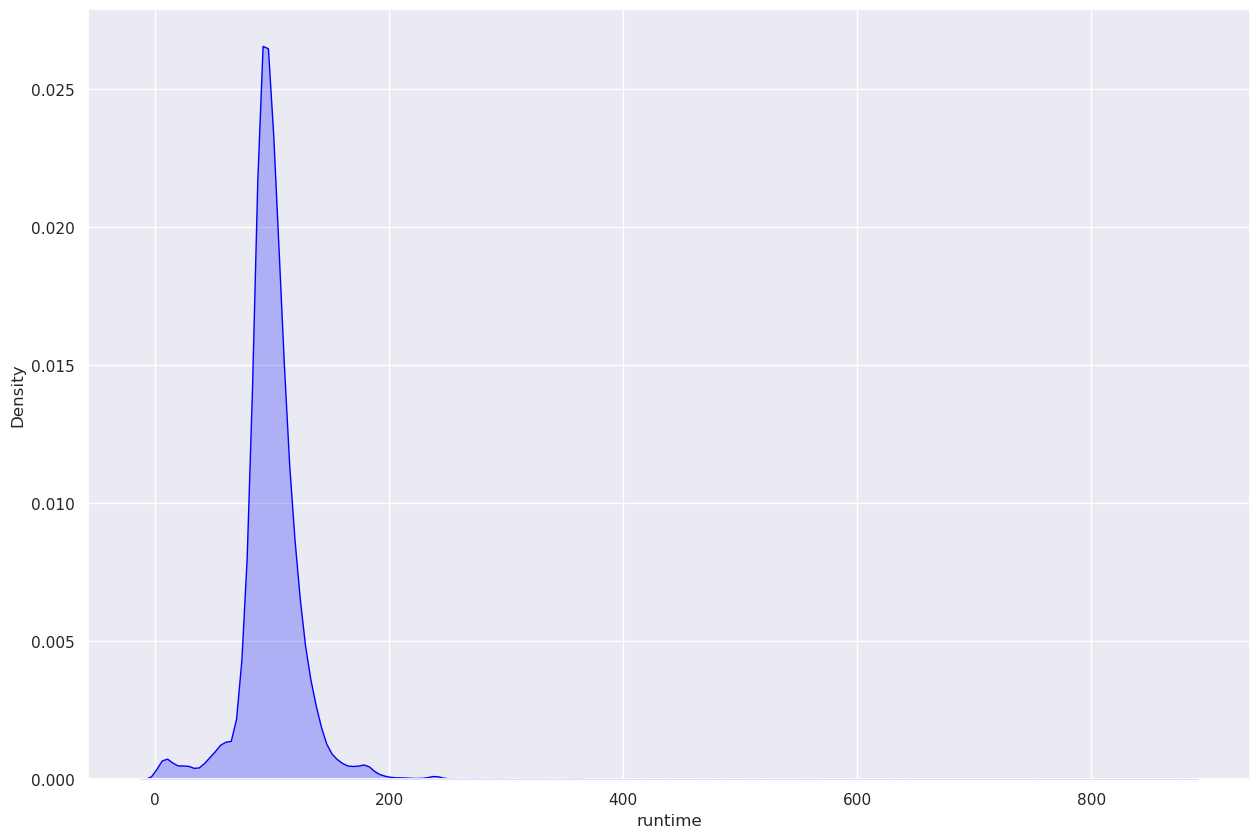

In [58]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=imdb_df['runtime'], shade=True, color='blue')

let us do a descriptive analysis to make more sense of our graph above:

In [54]:
# Describe the runtime 
imdb_df['runtime'].describe()

count    15189.000000
mean       100.312331
std         31.061707
min          1.000000
25%         89.000000
50%         98.000000
75%        109.000000
max        877.000000
Name: runtime, dtype: float64

Here it can be seen that the average length of a movie is 1hr 40 minutes ,with the longest one having 877 minutes. There is also  a film as short as 1 minute. 

### 3.5. GENRES

### 3.5.1. The most common Genres observed

In [38]:
def feature_frequency(df, column):
    """
    Function to count the number of occurences of metadata such as genre
    Parameters
    -------
    """
    # Creat a dict to store values
    df = df.dropna(axis=0)
    genre_dict = {f'{column}': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    print('retrieving features...')
    for movie in range(len(df)):
        gens = df[f'{column}'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict[f'{column}']:
                genre_dict[f'{column}'].append(gen)
    # count the number of occurences of each genre
    print('counting...')
    for genre in genre_dict[f'{column}']:
        count = 0
        for movie in range(len(df)):
            gens = df[f'{column}'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
    data = pd.DataFrame(genre_dict)
    print('done!')
    return data
genres = feature_frequency(movies_df, 'genres')

retrieving features...
counting...
done!


In [39]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], palette='Set1', orient='h', edgecolor='white',)
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

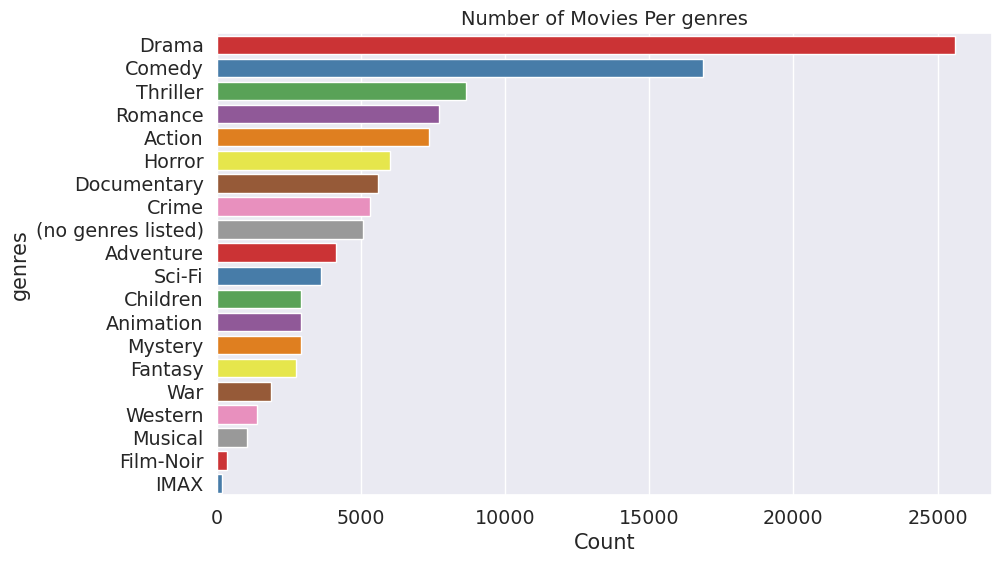

In [40]:
feature_count(genres.sort_values(by = 'count', ascending=False), 'genres')

Here we can see about 5000 movies have no (genres listed) .Drama can also be seen as the most frequent genre in the database. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor.

Other major genres in the top 10 are Thriller, Romance,Action, Horror, Documentary and Crime.
IMAX is not a genre but rather a proprietary system for mass-viewings.

We can use the IMDB and TMDB ID's together with the APIs to fill missing data. 

##### The above figure does tell us the most frequent genres in the database but nothung about the popularity of the genres, lets look at the most popular movies in a particular time based on their ratings

In [41]:
def most_watched(input_df):  
    """"
    This function creates a plot showing the popularity of each genre 
    over the last 50 years.
    
    """   
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies_df,on='movieId',how='left')
    
    # Create an empty dataframe
    b = pd.DataFrame()
    
    # Extract the timestamps and genres 
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|',',') for genres in df.genres]).split(','))
    
    # Get the number of ratings for each genre for each year since 1970
    for index,genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i]/31536000)+1970) for i,x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b,pd.DataFrame({genre:a})],axis=1)
    
    # Plot the trends for each genre on the same line graph 
    plt.figure(figsize=(20,10))
    plot = sns.lineplot(data=b, dashes=False)
      
    # Add plot labels
    plt.title('Trends in genre popularity',fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)
    
    plt.show()
    
    return most_watched(train_df)

According to this graph we have the most popular genres are  Drama and comedy,with drama being the most popular at all times since 1995.

### 3.5.2. Top-N Recommendations

With our content similarity matrix computed, we're now ready to make some recommendations. We will begin by generating a top-N list of movies similar to one which we prompt the system with.


### 3.6. RELEASE YEAR

The dataset has 48213 movies available to us. It is reasonable to assume that it does include almost every major film released during those years. With these assumptions in mind, let us take a look at the number of movies produced by the year.

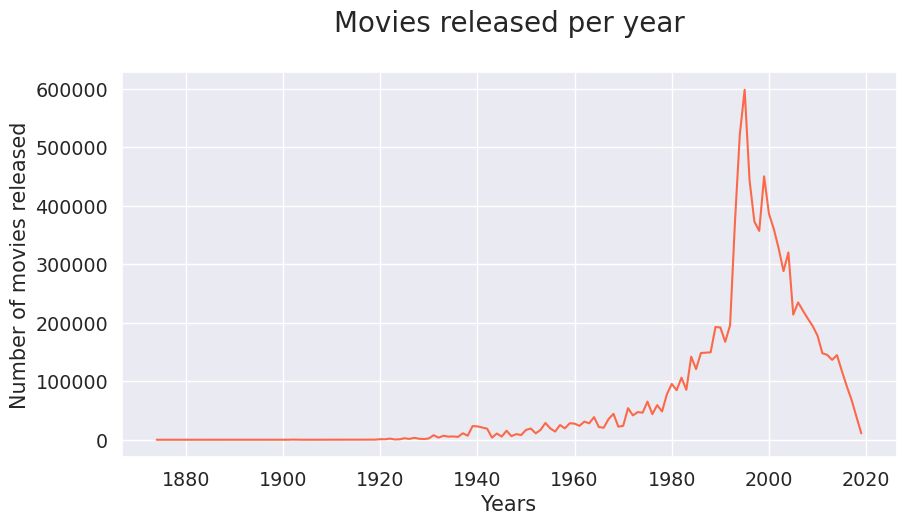

In [42]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show() 

It is observed that most movies were released as we approached 2000 and reached at their peak during the 1990's,This could be because the increase in technological advancements like the introduction of motion picture projectors and more people having access to the entertainment in theatres.

In [43]:
# merge train and movie data on movieId and sort the table
train_joined = pd.merge(train_df.drop(columns = 'timestamp'),movies_df, how = 'inner', on = 'movieId').sort_values(by = ['userId','movieId'])
# confirm if joined table has the correct amount of observations
print(train_joined.shape)
# view first five rows of joined table
train_joined.head()

(10000038, 5)


,userId,movieId,rating,title,genres
502801,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
6852635,1,665,5.0,Underground (1995),Comedy|Drama|War
6086993,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance
6325668,1,1175,3.5,Delicatessen (1991),Comedy|Drama|Romance
5047680,1,1217,3.5,Ran (1985),Drama|War


In our first five lines we observe that user 1 likes __Pulp fiction and Underground the most__ the user has given a rating of 5 for both films

### 3.7. DIRECTORS

### 3.7.1. Who are the most common directors?

We will only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors

In [44]:
def count_directors(df, count = 10):
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

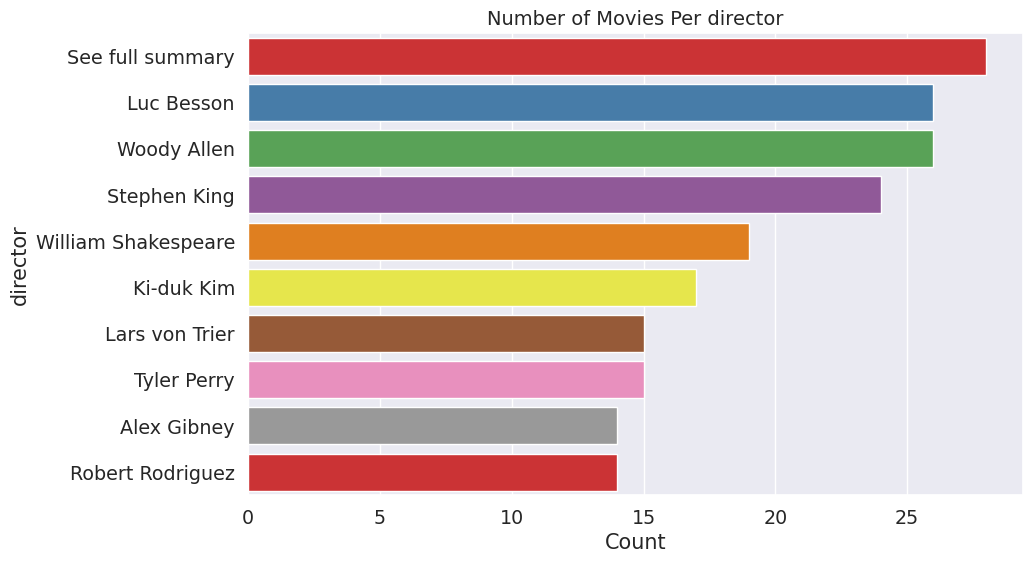

In [45]:
feature_count(directors.head(10), 'director')

'see full summary' is not a director ,we can use IMDB API to retrieve this data,so Luc Besson and woody Allen can be seen as the most common directors.

##### We could also use a word cloud to show the same while remove the 'see full summary'.

### 3.7.2. Preparing a data set for word cloud and corpus generation

In [46]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)

In [47]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces 
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes 
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))


# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))
df.head()

,movieId,title_cast,director,plot_keywords,genres,title,year
0,1,tomhanks timallen donrickles,johnlasseter,toy rivalry cowboy cgi animation,adventure animation children comedy fantasy,Toy Story (1995),1995
1,2,robinwilliams jonathanhyde kirstendunst,jonathanhensleigh,board game adventurer fight game,adventure children fantasy,Jumanji (1995),1995
2,3,waltermatthau jacklemmon sophialoren,markstevenjohnson,boat lake neighbor rivalry,comedy romance,Grumpier Old Men (1995),1995
3,4,whitneyhouston angelabassett lorettadevine,terrymcmillan,black american husband wife relationship betra...,comedy drama romance,Waiting to Exhale (1995),1995
4,5,stevemartin dianekeaton martinshort,alberthackett,fatherhood doberman dog mansion,comedy,Father of the Bride Part II (1995),1995


In [49]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be removed 
    removed = ['nan', ' nan', 'nan ', 'seefullsummary', ' seefullsummary', 'seefullsummary ']
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in removed]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=1000,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Blues').generate_from_frequencies(words)

    return wordcloud 

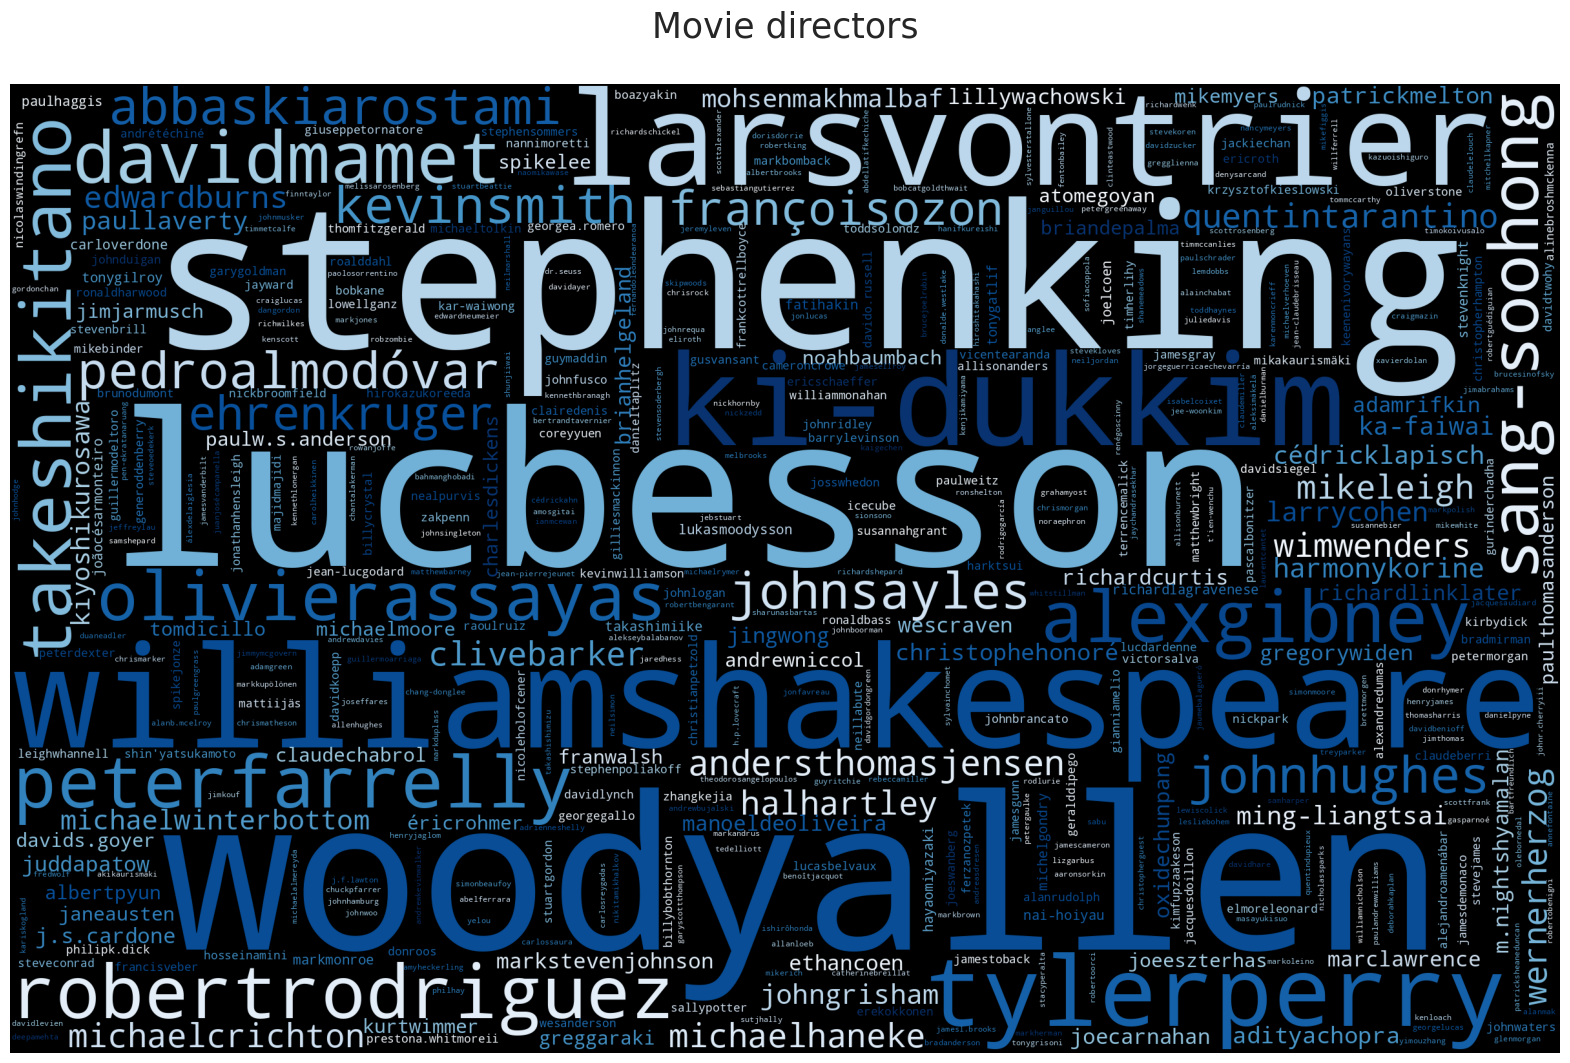

In [50]:
# Generate a WordCloud using the movie directors  
directorc = wordcloud_generator(df, 'director')

# Plot the WordCloud 
f = plt.figure(figsize=(20, 15)) 
plt.imshow(directorc) 
plt.axis('off') 
plt.title('Movie directors\n', fontsize=25)
plt.show()

As seen earlier, Lucbesson, Stephen King, Woodyallen, Ki-dukkim and William Shakepeare are the most popular directors based on the number of films in the database that they have directed.Stephen King and william Shakespear are both writers and not directors but lots of films have been made based on their books.

We could also try and see the the most popular directors based on their ratings. We will do this by calculating the mean rating for each director to determine the most popular.

In [51]:
def count_directors(df, count = 10):
    
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb_df)

In [52]:
def dir_mean(df):
    df.set_index('director', inplace=True)
    direct_ratings = []
    
    directors_eda = eda_df.merge(imdb_df, on = 'movieId', how = 'left')
    for director in df.index:
        rating = round(directors_eda[directors_eda['director']==director]['rating'].mean(),2)
        direct_ratings.append(rating)
    df['mean_rating'] = direct_ratings
    return df.sort_values('mean_rating', ascending = False)

In [53]:
directors = dir_mean(directors)

In [54]:
directors.head()

,count,mean_rating
director,,
Stephen King,24,4.05
Quentin Tarantino,10,3.94
John Sayles,11,3.93
Ki-duk Kim,17,3.89
Pedro Almodóvar,11,3.85


In [56]:
def feat_popularity(df, title = 'feat'):
    """
    Plots the mean rating per director.
    """
    plt.figure(figsize=(10,6))
    plot_data = df.copy()
    mean = plot_data['mean_rating'].mean()
    min_ = plot_data['mean_rating'].min()
    max_ = round(plot_data['mean_rating'].max(),2)
    sns.barplot(y = plot_data.index, x = plot_data['mean_rating'], order = plot_data.index, orient='h',palette='Set1', edgecolor='black' )
    plt.axvline(x=mean, label = f'mean {round(mean,1)}' , color='black', lw=1, ls ='--')
    plt.axvline(x=min_, label = f'min {round(min_,1)}' , color='#4D17A0', lw=1, ls = '--')
    plt.axvline(x=max_, label = f'max {max_}' , color='#4DA017', lw=1,ls = '--')
    plt.title(f'Mean Rating Per {title}', fontsize=14)
    plt.ylabel(f'{title}')
    plt.xlabel('Mean Rating')
    plt.legend(loc='lower center')
    plt.show()

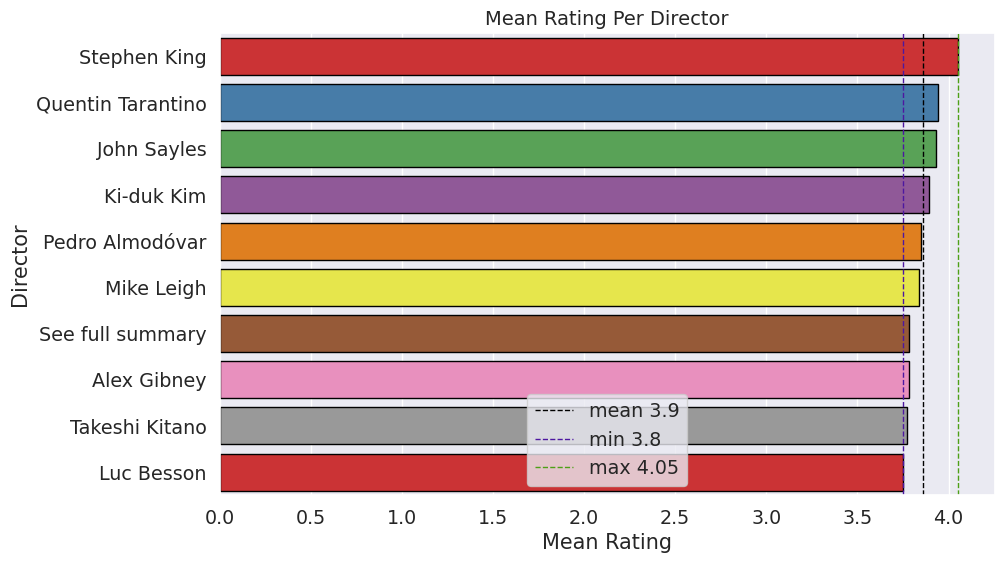

In [57]:
feat_popularity(directors.head(10), 'Director')

<a id="four"></a>
## 4. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Machine learning algorithms in recommender systems typically fit into two categories: content-based systems and collaborative filtering systems. Modern recommender systems combine both approaches.

### 4.1. RECOMMENDER SYSTEMS EXPLAINED

<center><img src="https://miro.medium.com/v2/resize:fit:998/0*fXPXXUcwBqjtKZIH.png"/></center>

### 4.1.1. Content-based filtering

This makes recommendations based on user preferences for product features. It is able to recommend new items, but is limited by the need for more data of user preference to improve the quality of recommendations.

### 4.1.2. Collaborative filtering

Collaborative filtering mimics user-to-user recommendations.

### 4.1.3. Hybrid systems

A combination of these two recommendations systems is called a hybrid system. They mix the features of the item itself and the preferences of other users

### 4.2. MODELS USED IN COLLABORATIVE FILTERING

With the Surprise library, the following algorithms will be used. RMSE is used as the accuracy metric for the predictions.

### 4.2.1. NormalPredictor
A basic algorithm that does not do much work but that is still useful for comparing accuracies. This algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.
The prediction $\hat{r}_{ui}$ is generated from a normal distribution $\mathcal{N}(\hat{\mu},\hat{\sigma}^{2})$ where $\hat{\mu}$ and $\hat{\sigma}$ are estimated from the training data using Maximum Likelihood Estimation:
$$\hat{\mu}=\frac{1}{\mid{R_{train}}\mid}\sum_{r_{ui}\in{R_{train}}} r_{ui}$$
$$\hat{\sigma}=\sqrt{\sum_{r_{ui}\in{R_{train}}} \frac{(r_{ui}-\hat{\mu})^2}{\mid{R_{train}}\mid}}$$
​
### 4.2.2. BaselineOnly
A basic algorithm that does not do much work but that is still useful for comparing accuracies. This algorithm predicts the baseline estimate for a given user and item. 
$$\hat{r}_{ui}=b_{ui}=\mu+b_u+b_i$$
If user $u$ is unknown, then the bias $b_u$ is assumed to be zero. The same applies for item $i$ with $b_i$.
​
### 4.2.3. KNNBasic
This is an algorithms that is directly derived from a basic nearest neighbors approach. The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
​
The actual number of neighbors that are aggregated to compute an estimation is necessarily less than or equal to $k$. First, there might just not exist enough neighbors and second, the sets $N^{k}_{i}(u)$ and $N^{k}_{u}(i)$ only include neighbors for which the similarity measure is **positive**. It would make no sense to aggregate ratings from users (or items) that are negatively correlated. For a given prediction, the actual number of neighbors can be retrieved in the `actual_k` field of the `details` dictionary of the `prediction`.
The prediction $\hat{r}_{ui}$ is set as:
<img src="https://github.com/hesterstofberg/flipcards/blob/master/KKNbasic.png?raw=true"/>
depending on the `user_based` field of the `sim_options` parameter.
​
​
### 4.2.4. SVD
​
​
![image.png](https://miro.medium.com/max/875/1*dnvjYsiEhj-NzFf6ZeCETg.jpeg)
​
​

The famous SVD algorithm, as popularized by [Simon Funk](https://sifter.org/~simon/journal/20061211.html) during the Netflix Prize.
​

**Singular Value Decomposition**

SVD is part of the method of principal components analysis, which is used to reduce the number of factors to a smaller number of factor groups (principal components) by specific operations in linear algebra, analogous to finding the least common denominator among a series of divisors in a group of numbers.
​
The prediction $\hat{r}_{ui}$ is set as: $\hat{r}_{ui}=\mu+b_u+b_i+q^{T}_{i}p_u$
​
If user $u$ is unknown, then the bias $b_u$ and the factors $p_u$ are assumed to be zero. The same applies for item $i$ with $b_i$ and $q_i$.
​
To estimate all the unknown, we minimize the following regularized squared error:
$$\sum_{r_{ui}\in{R_{train}}}(r_{ui}-\hat{r}_{ui})^{2}+λ(b^{2}_{i}+b^{2}_{u}+\parallel{q_{i}}\parallel^{2}+\parallel{p_{u}}\parallel^{2})$$ 
The minimization is performed by a very straightforward stochastic gradient descent:
$$b_u\gets{b_{u}+γ(e_{ui}−λb_{u})}$$
$$b_i\gets{b_{i}+γ(e_{ui}−λb_{i})}$$
$$p_u\gets{p_{u}+γ(e_{ui}.q_i−λp_{u})}$$
$$q_i\gets{q_{i}+γ(e_{ui}.p_u−λq_{i})}$$
​
where $e_{ui}=r_{ui}−\hat{r}_{ui}$. These steps are performed over all the ratings of the trainset and repeated `n_epochs` times. Baselines are initialized to `0`. User and item factors are randomly initialized according to a normal distribution, which can be tuned using the `init_mean` and `init_std_dev` parameters.
​
You also have control over the learning rate γ and the regularization term λ. Both can be different for each kind of parameter (see below). By default, learning rates are set to `0.005` and regularization terms are set to `0.02`.
​
​
### 4.2.4. SVDpp
The SVD++ algorithm, an extension of `SVD`, takes into account implicit ratings.
The prediction $\hat{r}_{ui}$ is set as:
$$\hat{r}_{ui}=μ+b_u+b_i+q^{T}_{i}(p_u+|I_u|^{−1/2}\sum_{j\in{I_u}}y_j)$$
​
Where the $y_j$ terms are a new set of item factors that capture implicit ratings. Here, an implicit rating describes the fact that a user $u$ rated an item $j$, regardless of the rating value.
​
If user $u$ is unknown, then the bias $b_u$ and the factors $p_u$ are assumed to be zero. The same applies for item $i$ with $b_i$, $q_i$ and $y_i$.
​
Just as for `SVD`, the parameters are learned using a SGD on the regularized squared error objective.
​
Baselines are initialized to `0`. User and item factors are randomly initialized according to a normal distribution, which can be tuned using the `init_mean` and `init_std_dev` parameters.
​
You have control over the learning rate γand the regularization term λ. Both can be different for each kind of parameter. By default, learning rates are set to `0.005` and regularization terms are set to `0.02`.
​
​
### 4.2.5. Nonnegative Matrix Factorization (NMF)
NMF is a matrix factorization method where we constrain the matrices to be nonnegative. It is very similar with SVD.
​
Suppose we factorize a matrix $X$ into two matrices $W$ and $H$ so that $X$ $\approx$ $WH$. There is no guarantee that we can recover the original matrix, so we will approximate it as best as we can. Now, suppose that $X$ is composed of m rows $x_1$, $x_2$, ... $x_m$ , $W$ is composed of k rows $w_1$, $w_2$, ... $w_k$,  $H$ is composed of m rows $h_1$, $h_2$, ... $h_m$ . Each row in $X$ can be considered a data point. For instance, in the case of decomposing images, each row in $X$ is a single image, and each column represents some feature.
​
<img src="https://github.com/hesterstofberg/flipcards/blob/master/NMF.png?raw=true"/>
​
Basically, we can interpret $x_i$ to be a weighted sum of some components (or bases if you are more familiar with linear algebra), where each row in $H$ is a component, and each row in $W$ contains the weights of each component.
​
<img src="https://github.com/hesterstofberg/flipcards/blob/master/NMF1.png?raw=true"/>
​
In practice, we introduce various conditions on the components, so that they can be interpreted in a meaningful manner. In the case of NMF, we constrict the underlying components and weights to be non-negative. Essentially, NMF decomposes each data point into an overlay of certain components.
​
### 4.2.6. SlopeOne
Slope One algorithm uses simple linear regression model.The prediction $\hat{r}_{ui}$ is set as:
$$\hat{r}_{ui}=\mu_{u}+\frac{1}{\mid{R_{i}(u)}\mid}\sum_{j\in{R_{i}(u)}}dev(i,j)$$
where $R_{i}(u)$ is the set of relevant items, i.e. the set of items $j$ rated by $u$ that also have at least one common user with $i$. $dev(i,j)$ is defined as the average difference between the ratings of $i$ and those of $j$:
$$dev(i,j)=\frac{1}{\mid{U_{ij}}\mid}\sum_{u\in{U_{ij}}}r_{ui}-r_{uj}$$
​
### 4.2.7. CoClustering
Basically, users and items are assigned some clusters $C_u, C_i$, and some co-clusters $C_{ui}$. The prediction $\hat{r}_{ui}$ is set as:
$$\hat{r}_{ui}=\bar{C_{ui}}+(μ_u−\bar{C_u})+(μ_i−\bar{C_i})$$
where $\bar{C_{ui}}$ is the average rating of co-cluster $C_{ui}$, $C_u$ is the average rating of $u$’s cluster, and $\bar{C_i}$ is the average rating of $i$’s cluster. 
​
If the user is unknown, the prediction is $\hat{r}_{ui}=μ_i$. If the item is unknown, the prediction is $\hat{r}_{ui}=μ_u$. If both the user and the item are unknown, the prediction is $\hat{r}_{ui}=μ$.

### 4.3. CONTENT-BASED FILTERING IN APPLICATION

<center><img src="https://d2mk45aasx86xg.cloudfront.net/Pictorial_representation_of_content_based_filtering_in_recommender_system_3c43e9c65e.webp" height=50%/></center>

A content-based recommender system strives to give the best user experience by tailoring the product to the user.This is done by using content based filtering methods. These methods utilise the description of the characteristics of the item such as the genre, category, tags etc.With all that theory in mind, the Content-Based Recommendation system that we built computes similarity between movies based on 'title_cast', 'director', 'plot_keywords'and 'genres'. The model was not used to predict ratings for the testing data, as it is too computationally expensive.

* Item level data source -
You need a strong source of data associated to the attributes of the item. The more information you know regarding the item, the more beneficial it will be for your system.

* User level data source -
You need some sort of user feedback based on the item you’re providing recommendations for. This level of feedback can be either implicit or explicit.  The more user feedback you can track, the more beneficial it will be for your system.

### 4.3.1. Forming Corpus for application

These columns will be combined to form the corpus for each film which will then be used to determine the similarity between films.

In [15]:
df = imdb_df[['movieId','title_cast','director', 'plot_keywords']]
df = df.merge(movies_df[['movieId', 'genres', 'title']], on='movieId', how='inner')
df['year'] = df['title'].str.extract(r"\((\d+)\)", expand=False)

### 4.3.2. Corpus Preprocessing

In [16]:
# Convert data types to strings for string handling
df['title_cast'] = df.title_cast.astype(str)
df['plot_keywords'] = df.plot_keywords.astype(str)
df['genres'] = df.genres.astype(str)
df['director'] = df.director.astype(str)

# Removing spaces 
df['director'] = df['director'].apply(lambda x: "".join(x.lower() for x in x.split()))
df['title_cast'] = df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))

# Discarding the pipes 
df['title_cast'] = df['title_cast'].map(lambda x: x.split('|')[:3])
df['title_cast'] = df['title_cast'].apply(lambda x: " ".join(x))


# Discarding the pipes between the plot keywords' and getting only the first five words
df['plot_keywords'] = df['plot_keywords'].map(lambda x: x.split('|')[:5])
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: " ".join(x))

# Discarding the pipes between the genres 
df['genres'] = df['genres'].map(lambda x: x.lower().split('|'))
df['genres'] = df['genres'].apply(lambda x: " ".join(x))


### 4.3.3. Preparing data for the model 

In [17]:
# Creating an empty column and list to store the corpus for each movie
df['corpus'] = ''
corpus = []

# columns of interest
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(df['movieId'])):
    words = ''
    for col in columns:
        words = words + df.iloc[i][col] + " "        
    corpus.append(words)

# Add the corpus information for each movie to the dataframe 
df['corpus'] = corpus
df.set_index('movieId', inplace=True)

# Drop the columns we don't need 
df.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

df.head()

,title,year,corpus
movieId,,,
1,Toy Story (1995),1995,tomhanks timallen donrickles johnlasseter toy ...
2,Jumanji (1995),1995,robinwilliams jonathanhyde kirstendunst jonath...
3,Grumpier Old Men (1995),1995,waltermatthau jacklemmon sophialoren marksteve...
4,Waiting to Exhale (1995),1995,whitneyhouston angelabassett lorettadevine ter...
5,Father of the Bride Part II (1995),1995,stevemartin dianekeaton martinshort alberthack...


### 4.3.4. Vectorizing the content 

The content-based recommender system that we are developing makes use of the descriptions of the characteristics of the movie.These description are often qualitative.To utilise this vital information we vectorized the qualitative feature.We used the  **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** which is commonly used as an  information retrieval systems and also content based filtering mechanisms (such as a content based recommender). The TF-IDF vectorizer is commonly used to determine the relative importance of a document / article / news item / movie etc.
​
This informed our decision of using the  TfidfVectorizer function from scikit-learn to transforms text to feature vectors that can be used as input to estimator.
​

In [18]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
vec = tf.fit_transform(df['corpus'])

### 4.3.5. Finding the Similarities between movies

To find the similarities between two movies we made use of the Cosine Similarity to calculate a numeric quantity that denotes the similarity between the two movies.
Cosine similarity is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.
We made use of sklearn's linear_kernel to generate the cosine similarities.

In [19]:
cos_sim = cosine_similarity(vec, vec)
print(cos_sim.shape)
cos_sim[:6]

(24866, 24866)


array([[1.        , 0.02601059, 0.04019328, ..., 0.00592263, 0.        ,
        0.01682672],
       [0.02601059, 1.        , 0.        , ..., 0.02850676, 0.        ,
        0.01630372],
       [0.04019328, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00266976, 0.        , 0.00788265, ..., 0.        , 0.        ,
        0.        ],
       [0.0029888 , 0.        , 0.00322678, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 4.3.6. Top-N Recommendations

With our content similarity matrix computed, we're now ready to make some recommendations. We will begin by generating a top-N list of movies similar to one which we prompt the system with.


In [20]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    """ 
    df1 = df.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=df['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Peter Pan (2003)').head(10)

986                        Escape to Witch Mountain (1975)
1953             Darby O'Gill and the Little People (1959)
2002                                   Return to Oz (1985)
2070                         NeverEnding Story, The (1984)
2307                         Santa Claus: The Movie (1985)
10715    Brothers Lionheart, The (Bröderna Lejonhjärta)...
15233                           Alice in Wonderland (1933)
24008              Journey to the Beginning of Time (1955)
2322                          Young Sherlock Holmes (1985)
Name: title, dtype: object

Since you liked Peter Pan you most probably would also like the above movies which shares the same properties *eg.genre* as peterpan.
​
However some of the limitations  of the content based filter are :
​
* It does not recommend items outside a user's content profile
* It is unable to exploit quality judgements of other users
* Consumers might have multiple interests

### 4.4. COLLABORATIVE-FILTERING IN APPLICATION

<center><img src="https://developer-blogs.nvidia.com/wp-content/uploads/2021/04/Whats-recommendation-system_Pic-2.png"/></center>
The collaborative filtering approach builds models based on user’s past behaviors as well as similar decisions made by other users. This model is used to predict items (or ratings for items) that the user may have an interest in. Within collaborative filtering, there are two well-known distinct approaches:

- Memory-Based: models calculate the similarities between users / items based on user-item rating pairs.
- Model-Based: models use some sort of machine learning algorithm to estimate the ratings

In our modelling we're going to use the surprise package. Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. The name SurPRISE stands for Simple Python RecommendatIon System Engine.

Surprise allows us to use a built-in datasets, Movielens. We'll use this data to run experiments on with different models before we decide on a model and use it on our own data.It also provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVDpp, NMF), and many others..

From the Suprise library, the following algorithms were used:
​
### Basic algorithms

__NormalPredictor:__ this algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.
​

__BaselineOnly:__ this algorithm predicts the baseline estimate for given user and item.

​
### k-NN algorithms


__KNNBasic:__ this is a basic collaborative filtering algorithm.
​

__KNNWithMeans:__ this is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

​
__KNNWithZScore:__ this is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.
​

__KNNBaseline:__ is a basic collaborative filtering algorithm taking into account a baseline rating.
​

### Matrix Factorization-based algorithms

__SVD__ singular value decomposition (SVD) is a matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m)
​

SVD is similar to Principal Component Analysis (PCA), but more general.
​

​
__SVDpp:__ this algorithm is an extension of SVD that takes into account implicit ratings.
​

__NMF:__ Non-negative matrix factorization, also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into two matrices W and H, with the property that all three matrices have no negative elements
​

__SlopeOne:__ Slope One is a family of algorithms used for collaborative filtering, introduced in a 2005 paper by Daniel Lemire and Anna Maclachlan. Arguably, it is the simplest form of non-trivial item-based collaborative filtering based on ratings. Their simplicity makes it especially easy to implement them efficiently while their accuracy is often on par with more complicated and computationally expensive algorithms
​

__Coclustering:__ is a collaborative filtering algorithm based on co-clustering.
​

### 4.4.1. Applying the algorithms (Testing on a random movies dataset with 100 000 entries)

In [26]:
#Implement an algorithm
algo = [SVD(random_state=42), SVDpp(random_state=42), SlopeOne(), NMF(random_state=42), NormalPredictor(), KNNBaseline(random_state=42), 
                  KNNBasic(random_state=42), KNNWithMeans(random_state=42), KNNWithZScore(random_state=42), BaselineOnly(), CoClustering(random_state=42)]


# Load the movielens-100k dataset (download it if needed),
data2 = Dataset.load_builtin('ml-100k')
#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
SVDpp,0.929676,35.538805,6.379271
KNNBaseline,0.936131,0.655932,6.187280
SVD,0.946761,1.270171,0.422428
BaselineOnly,0.947027,0.310635,0.183075
SlopeOne,0.949498,0.702004,4.143847
KNNWithZScore,0.956222,0.448887,6.096981
KNNWithMeans,0.956982,0.372745,5.711031
NMF,0.972868,2.191939,0.235935
CoClustering,0.977157,2.141383,0.397314


In our sampled dataset the SVD++ performed the best having the lowest RMSE out of the rest followed by KNNBaseline

<a id="five"></a>
## 5. Performance Evaluation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

There are two main ways to evaluate a recommender system’s performance: Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). RMSE measures the squared loss, while MAPE measures the absolute loss. Lower values mean lower error rates and thus better performance.
Both are good as they allow for easy interpretation.For our project We built and tested 11 different collaborative filtering models and compared their performance using the RMSE 

##### Root Mean Squared Error (RMSE):
​
![rmse.png](https://images.squarespace-cdn.com/content/v1/58c95854c534a56689231265/1531152039771-PI1ZAS4DSZCCUBST3KEK/Formula.PNG)

Where:

fi is the actual rating

oi is the predicted ratings and

n is the total number of predictions

### 5.1. MODEL PERFORMANCE (on ml-100k dataset)

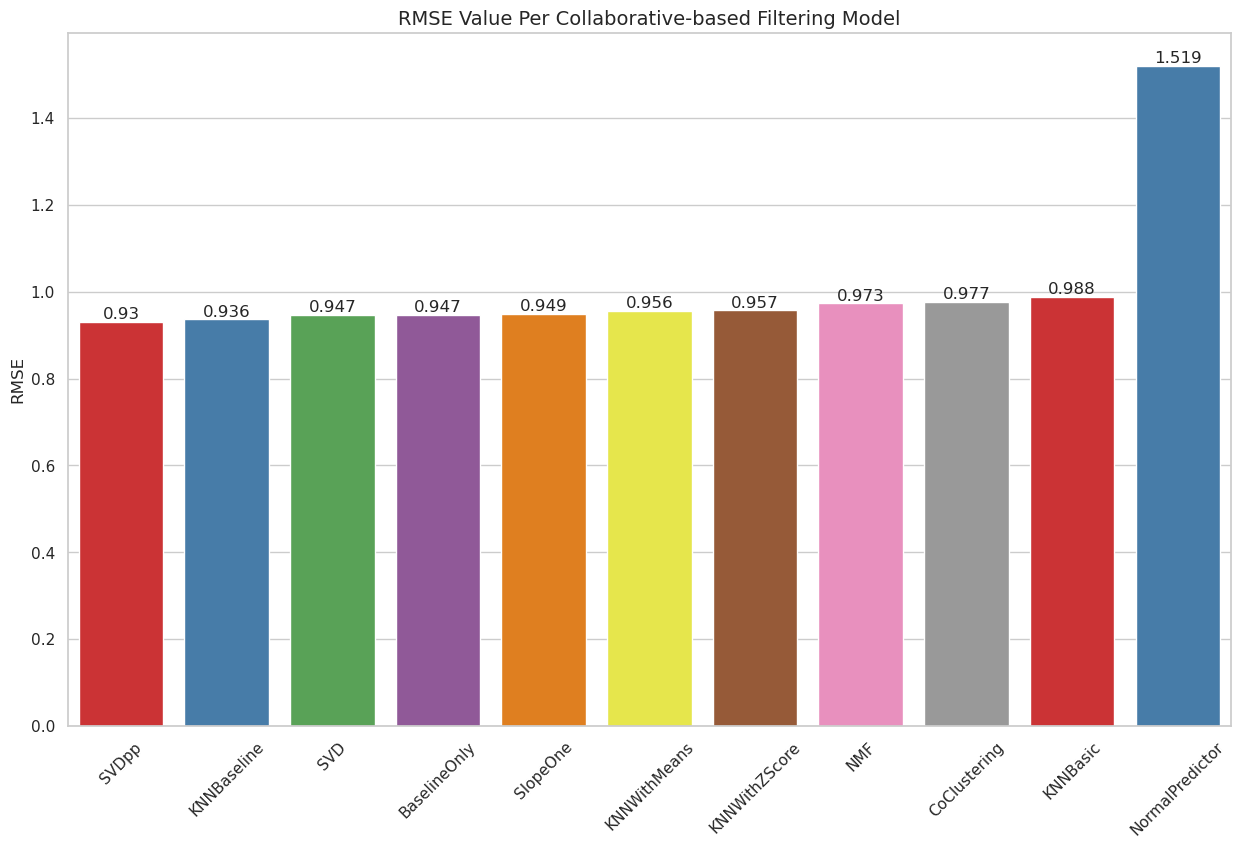

In [27]:
# Compare RMSE values between models
fig,axis = plt.subplots(figsize=(15, 9))
rmse_x = ['SVDpp','KNNBaseline','SVD','BaselineOnly', 'SlopeOne', 'KNNWithMeans','KNNWithZScore','NMF',
          'CoClustering','KNNBasic','NormalPredictor']
rmse_y = [0.929676,0.936131,0.946761,0.947027,0.949498,0.956222,0.956982,0.972868,0.977157,0.988330,1.518916]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='Set1',edgecolor='white')
plt.title('RMSE Value Per Collaborative-based Filtering Model',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

From here we can see that the best three performing models are KNNBaseline,SVDPP and SVD. SVDPP is performing the best with an RMSE of 0.93 followed by KNNbaseline but they are both very computationaly expesive,we will go ahead and use the SVD algorithm on the whole dataset

### 5.2. APPLYING SVD ON OUR DATASET

To apply the algorithm to our own data we require a reader object, but only the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user (raw) ids, the item (raw) ids, and the ratings in this order (which we will specify below). Each row thus corresponds to a given rating.

### 5.2.1. Splitting the data

In [28]:
# Run on the subset of the train data to illustrate the model performance 
train  = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')

In [44]:
#Loading 100000 dataset
data4 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [45]:
trainset, testset = train_test_split(data4, test_size=0.05, random_state=42)

### 5.2.2. Training SVD and evaluation

In [46]:
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

RMSE: 0.9877


### 3.2.3. Hyperparameter tuning - SVD on the whole training dataset 

Hyperparameter tuning is the process of determining the right combination of hyperparameters that allows the model to maximize model performance. Setting the correct combination of hyperparameters is the only way to extract the maximum performance out of models.

Hyperparameter tuning on the whole dataset took a very long time to run,we will therefore do it for demonstration on a subset of the data.

In [47]:
df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')

In [48]:
reader = Reader(rating_scale=(0, 5))

In [49]:
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']].head(100000), reader)

In [50]:
param_grid = {'n_epochs':[40,50], 
              'n_factors':[400,500], 
               'init_std_dev':[0.001], 
              'random_state':[42,100]} 
grid_SVD = GridSearchCV(SVD, cv=5, measures=['rmse'], param_grid=param_grid, n_jobs=-1, joblib_verbose=10)
grid_SVD.fit(data)
print('Best Score is: ')
print(grid_SVD.best_score['rmse'])
print('Best Parameters are: ')
print(grid_SVD.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:  2.3min remaining:    7.3s


Best Score is: 
0.9662561401414381
Best Parameters are: 
{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.001, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.4min finished


Tuning the parameters gave an RMSE of 0.9662 which is an improvement of the previous score of 0.9877.
These are however different results from what we got from hypertuning on the whole data set which gave us the best parameters as:

{'n_epochs': 40, 'n_factors': 400, 'init_std_dev': 0.001, 'random_state': 42}

<a id="six"></a>
## 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 6.1. REMOVING OUTLIERS

While performing the eda we noticed an outlier in the number of ratings per user ID we will go ahead and use while removing the outlier and see if this will improve the model performance.

In [51]:
train_df = pd.read_csv('/kaggle/input/edsa-movie-recommendation-predict/train.csv')
train_df.drop(train_df.index[train_df['userId'] == 72315], inplace=True)
train_df = train_df.reset_index(drop=True)

### 6.2. CHECKING MODEL PERFORMANCE (After removing outliers) 

In [52]:
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data3= Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']].sample(100000), reader)# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data3, test_size=.25)

# Use the SVD algorithm.
algo2 = SVD(n_epochs = 40, n_factors = 400, init_std_dev = 0.005, random_state=42)

# Train the algorithm on the trainset, and predict ratings for the testset
algo2.fit(trainset)
predictions = algo2.test(testset)

# Compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9584


0.9583999266039177

Removing the outlier improves the performance of the model from 0.9662 on the sample trainset to 0.9584. We will therefore use this on the whole dataset for Kaggle submission.

### 6.3. TRAINING HYPERTUNED SVD (on whole dataset)

In [ ]:
# Train model on whole dataset
reader = Reader(rating_scale=(train_df['rating'].min(), train_df['rating'].max()))
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd = SVD(n_epochs = 50, n_factors = 1000, init_std_dev = 0.001, random_state=42, verbose=True)
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39


<a id="seven"></a>
## 7. Model Predictions on Unseen data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

### 7.1. KAGGLE SUBMISSION

In [ ]:
# Create Kaggle submission file
predictions = []
for i, row in test_df.iterrows():
    x = (svd.predict(row.userId, row.movieId))
    pred = x[3]
    predictions.append(pred)
test_df['Id'] = test_df['userId'].map(str) +'_'+ test_df['movieId'].map(str)
results = pd.DataFrame({"Id":test_df['Id'],"rating": predictions})
results.to_csv("submission2.csv", index=False)

### 7.2. OVERVIEW PERFORMANCE OF SVD

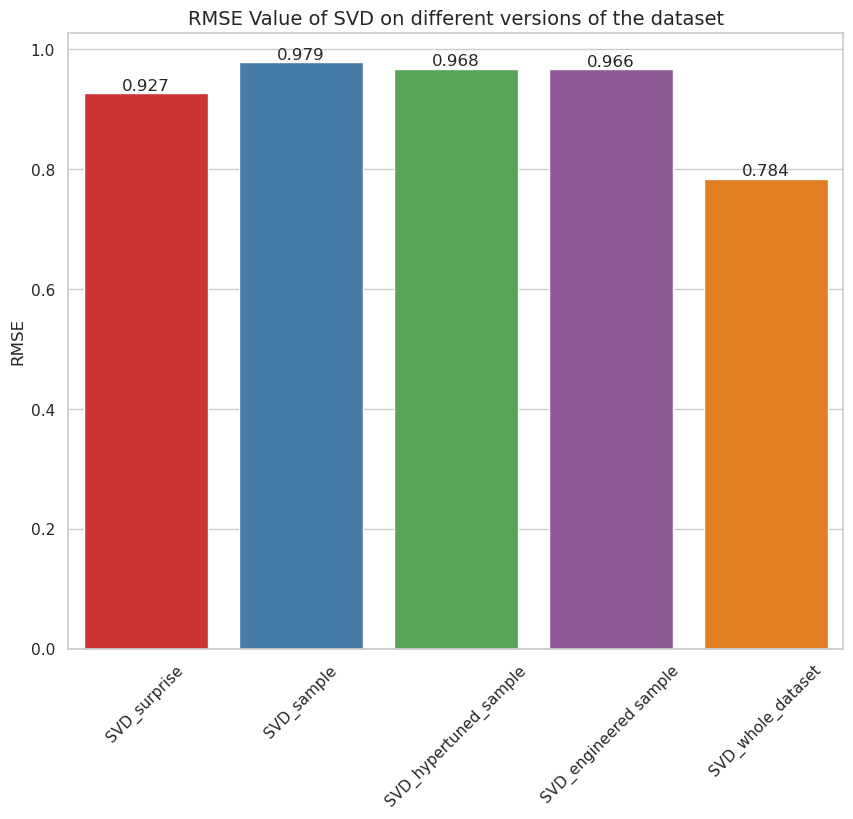

In [62]:
# Compare RMSE of SVD of different versions of the dataset
fig,axis = plt.subplots(figsize=(10, 8))
rmse_x = ['SVD_surprise', 'SVD_sample', 'SVD_hypertuned_sample', 'SVD_engineered sample', 'SVD_whole_dataset']
rmse_y = [0.926883,0.9789,0.9677,0.9664,0.7840]
ax = sns.barplot(x=rmse_x, y=rmse_y,palette='Set1',edgecolor='white')
plt.title('RMSE Value of SVD on different versions of the dataset',fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('RMSE')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_y() + p.get_height(), round(p.get_height(),3), fontsize=12, ha="center", va='bottom')
    
plt.show()

The singular value decomposition (SVD) algorithm is a baseline approach to recommender systems, as it has a broad range of applications including dimensionality reduction, solving linear inverse problems, and data fitting. The SVD algorithm generally performs better on large datasets compared to some other models as it decomposes a matrix into constituent arrays of feature vectors corresponding to each row and each column.

<a id="eight"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In order to construct a recommendation algorithm capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences we dealt with a large dataset which afforded us the opportuninty to gather insights that could be used to better understand our user's behaviour and which allowed us to dig deeper in understanding how different features can be used to maximise a consumer's experience.

While in the beginning of recommender systems it was important to find exact similarity in people and products, a more effective method has been used to look at similarity of latent attributes. This is done by using matrix factorization algorithms eg the SVD algorithm. To oversimplify, all of the attributes for an item or a customer are combined in a way which reveals relationships that have not yet been realized.

Recommender systems can be a very powerful tool in a company’s arsenal, and future developments like the use of hybrid algorithms which combines collaborative and content-based filtering together may help in overcoming the shortcoming we are facing at using them separately and also can be more effective .This is going to increase business value even further. Some of the applications include being able to anticipate seasonal purchases based on recommendations, determine important purchases, and give better recommendations to customers which can increase retention and brand loyalty.